In [9]:
# HÜCRE 1: Gerekli Araçların (Kütüphanelerin) Yüklenmesi
# Projemizin veri analizi ve görselleştirme kısımları için Pandas, Seaborn gibi temel kütüphaneleri çağırıyoruz.

import pandas as pd             # Veriyi tablo (DataFrame) olarak işlemek için
import numpy as np              # Sayısal işlemler ve logaritma dönüşümleri için
import seaborn as sns           # İstatistiksel grafikleri çizdirmek için
import matplotlib.pyplot as plt # Grafiklerin boyut ve başlık ayarları için
import warnings                 # Kod çalışırken çıkan gereksiz uyarıları gizlemek için

# Kod çıktısının temiz görünmesi için uyarıları kapatıyoruz
warnings.filterwarnings('ignore')

# Pandas ayarları: Çok sütunlu verilerde tüm sütunları görebilmek için
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

print("✅ Başlangıç Tamam: Analiz için gerekli tüm kütüphaneler hazır!")

✅ Başlangıç Tamam: Analiz için gerekli tüm kütüphaneler hazır!


In [10]:
# HÜCRE 2: Veri Setinin Yüklenmesi ve İlk Kontroller
# Veriyi sadece yüklemekle kalmıyor, olası dosya yolu hatalarını ve sütun isimlendirme sorunlarını (boşluklar) baştan çözüyoruz.

import os
import pandas as pd

# Dosya yolunu tanımlıyoruz
dosya_yolu = "Life Expectancy Data.csv"

# 1. ADIM: Dosya Kontrolü (Hata almamak için önlem)
if not os.path.exists(dosya_yolu):
    print(f"❌ HATA: '{dosya_yolu}' dosyası bu klasörde bulunamadı!")
    print("📂 Mevcut klasördeki dosyalar:", os.listdir())
    # Hata varsa işlemi durdur
    raise FileNotFoundError("Dosya bulunamadı. Lütfen dosya adını veya klasörü kontrol edin.")

try:
    # 2. ADIM: Veriyi Oku
    df = pd.read_csv(dosya_yolu)
    print(f"✅ BAŞARILI: Veri seti sorunsuz yüklendi.")
    print(f"📊 Boyut: {df.shape[0]} Gözlem (Satır) ve {df.shape[1]} Değişken (Sütun) var.")

    # 3. ADIM: Sütun İsimlerindeki Gizli Boşlukları Temizle
    # Veri setlerinde sıkça karşılaşılan " Life expectancy " gibi boşluk hatalarını düzeltiyoruz.
    hatali_sutunlar = [col for col in df.columns if len(col) != len(col.strip())]
    
    if hatali_sutunlar:
        print(f"\n⚠️ UYARI: Bazı sütun isimlerinde gereksiz boşluklar tespit edildi: {hatali_sutunlar}")
        df.columns = df.columns.str.strip()
        print("🛠️ DÜZELTME: Tüm sütun isimleri temizlendi ve standart hale getirildi.")
    else:
        print("✨ Sütun isimleri temiz, düzeltmeye gerek kalmadı.")

    # 4. ADIM: İlk Bakış
    print("\n📋 Veriden İlk 5 Örnek:")
    display(df.head())

except Exception as e:
    print("❌ BEKLENMEYEN BİR HATA OLUŞTU:")
    print(e)

✅ BAŞARILI: Veri seti sorunsuz yüklendi.
📊 Boyut: 2938 Gözlem (Satır) ve 22 Değişken (Sütun) var.

⚠️ UYARI: Bazı sütun isimlerinde gereksiz boşluklar tespit edildi: ['Life expectancy ', 'Measles ', ' BMI ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years']
🛠️ DÜZELTME: Tüm sütun isimleri temizlendi ve standart hale getirildi.

📋 Veriden İlk 5 Örnek:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


🚀 HÜCRE 3: Veri setimizin 'sağlık durumunu' kontrol ediyoruz: Nerelerde boşluklar var?


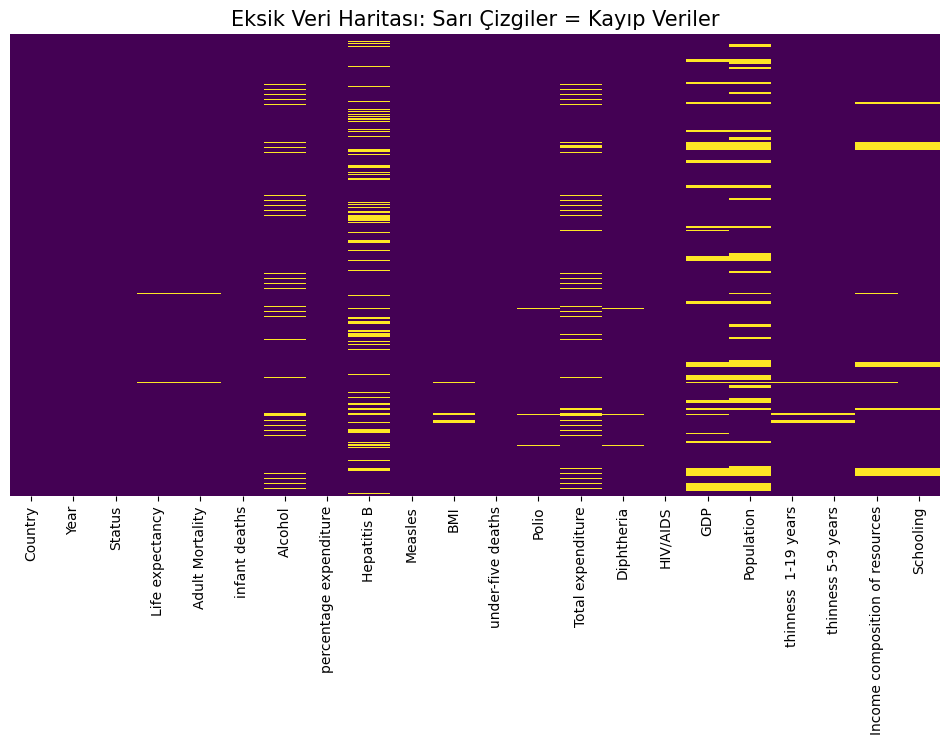


📊 Grafiğe baktığımızda bazı sütunlarda ciddi boşluklar görüyoruz.
Hangi değişkende tam olarak kaç tane veri eksik? İşte listesi:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


In [11]:
# HÜCRE 3: Veri Setinin Röntgenini Çekme (Eksik Veri Analizi)
# Analize başlamadan önce verimizin ne kadarının "kayıp" olduğunu görmemiz şart.
# Bu adımda, veri setindeki boşlukların (NaN) haritasını çıkarıyoruz.

print("🚀 HÜCRE 3: Veri setimizin 'sağlık durumunu' kontrol ediyoruz: Nerelerde boşluklar var?")

# 1. ADIM: Eksik Veri Isı Haritası (Heatmap)
# Bu görselde her bir sarı çizgi, verideki bir boşluğu temsil eder.
plt.figure(figsize=(12, 6))

# yticklabels=False yaptık çünkü 2938 satırın ismini yazarsak grafik okunmaz.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Eksik Veri Haritası: Sarı Çizgiler = Kayıp Veriler', fontsize=15)
plt.show()

# 2. ADIM: Sayısal Döküm
print("\n📊 Grafiğe baktığımızda bazı sütunlarda ciddi boşluklar görüyoruz.")
print("Hangi değişkende tam olarak kaç tane veri eksik? İşte listesi:")

missing_vals = df.isnull().sum()
# Sadece eksik verisi olanları (0'dan büyükleri) filtreleyip ekrana basalım
eksik_olanlar = missing_vals[missing_vals > 0]

if not eksik_olanlar.empty:
    print(eksik_olanlar.sort_values(ascending=False))
else:
    print("✅ Harika! Veri setinde hiç eksik veri bulunmuyor.")

🚀 HÜCRE EK-1: Eksik verilerin ciddiyetini ölçüyoruz (Yüzdesel Analiz)...


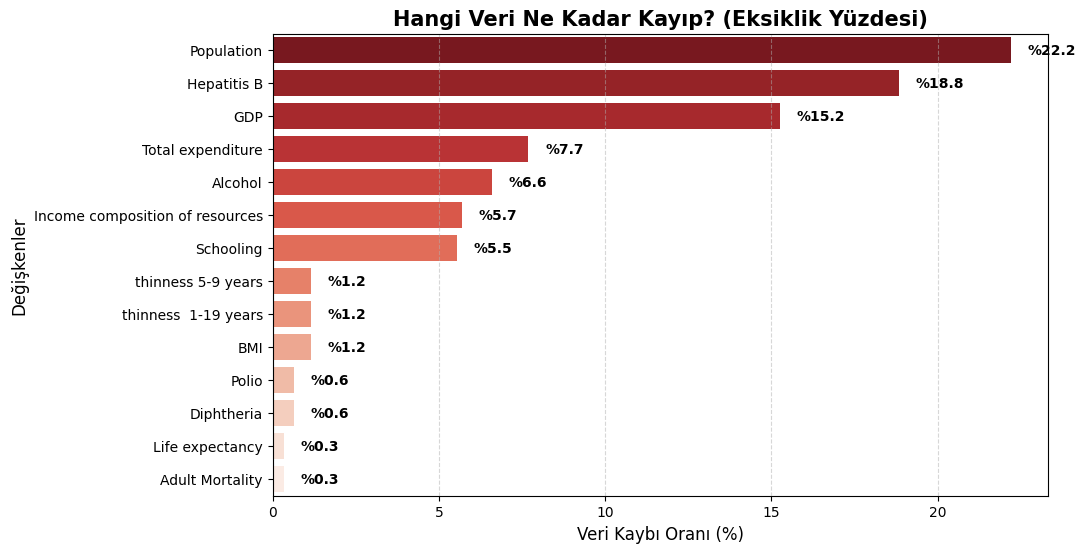

✅ TESPİT: Özellikle 'Population' (Nüfus) ve 'Hepatitis B' verilerinde ciddi kayıplar var.
   Bu sütunları tamamen silmek yerine, 'Akıllı Doldurma' yöntemiyle kurtarmayı deneyeceğiz.


In [12]:
# HÜCRE EK-1: Eksik Veri Detay Analizi (Yüzdesel Görünüm)
# Isı haritası bize "nerede" eksik olduğunu gösterdi, bu grafik ise "ne kadar" eksik olduğunu gösterecek.
# Hangi değişkenin ne kadar güvenilir olduğunu anlamak için bu oranlar kritik.

print("🚀 HÜCRE EK-1: Eksik verilerin ciddiyetini ölçüyoruz (Yüzdesel Analiz)...")

# 1. ADIM: Eksiklik Oranlarını Hesaplama
# (Eksik Sayısı / Toplam Satır) * 100 formülü ile yüzdeyi buluyoruz.
eksik_yuzdeler = df.isnull().mean() * 100

# Sadece eksik verisi olanları (0'dan büyükleri) alıp çoktan aza sıralayalım
eksik_yuzdeler = eksik_yuzdeler[eksik_yuzdeler > 0].sort_values(ascending=False)

# 2. ADIM: Görselleştirme (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=eksik_yuzdeler.values, y=eksik_yuzdeler.index, palette='Reds_r')

plt.title('Hangi Veri Ne Kadar Kayıp? (Eksiklik Yüzdesi)', fontsize=15, fontweight='bold')
plt.xlabel('Veri Kaybı Oranı (%)', fontsize=12)
plt.ylabel('Değişkenler', fontsize=12)

# Izgara çizgileri ekleyelim ki oranları okumak kolay olsun
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 3. ADIM: Çubukların Ucuna Net Değerleri Yazdırma
# Grafiğe bakan kişi "Bu çubuk kaça denk geliyor?" diye uğraşmasın.
for i, v in enumerate(eksik_yuzdeler.values):
    plt.text(v + 0.5, i, f'%{v:.1f}', va='center', fontweight='bold', color='black')

plt.show()

print("✅ TESPİT: Özellikle 'Population' (Nüfus) ve 'Hepatitis B' verilerinde ciddi kayıplar var.")
print("   Bu sütunları tamamen silmek yerine, 'Akıllı Doldurma' yöntemiyle kurtarmayı deneyeceğiz.")

In [13]:
# HÜCRE 4: Eksik Verileri Kurtarma Operasyonu (Akıllı Doldurma / Smart Imputation)
# Veriyi silmek en kolay yoldur ama biz veri kaybetmek istemiyoruz.
# Bu yüzden "Dünya Ortalaması" basıp geçmek yerine, her ülkenin kendi ortalamasını baz alan bir algoritma kurduk.

print("🚀 HÜCRE 4: Eksik veriler, verinin doğasını bozmadan 'Akıllı Yöntemle' dolduruluyor...")

# Sadece sayısal sütunları seçiyoruz (Çünkü 'Ülke Adı'nın ortalamasını alamayız)
sayisal_sutunlar = df.select_dtypes(include=[np.number]).columns

# STRATEJİMİZ:
# 1. Adım: Önce ülkenin kendi geçmişine bak (Örn: Afganistan'ın 2015 verisi yoksa, Afganistan ortalamasını kullan).
# 2. Adım: Eğer o ülkenin o verisi hiç yoksa, benzer statüdeki (Gelişmekte Olan) ülkelerin ortalamasına bak.
# 3. Adım: O da yoksa, son çare olarak Dünya ortalamasını al.

for col in sayisal_sutunlar:
    # 1. Aşama: Ülke bazlı doldurma
    df[col] = df[col].fillna(df.groupby('Country')[col].transform('mean'))
    
    # 2. Aşama: Statü (Gelişmiş/Gelişmekte) bazlı doldurma
    df[col] = df[col].fillna(df.groupby('Status')[col].transform('mean'))
    
    # 3. Aşama: Genel ortalama (Güvenlik ağı)
    df[col] = df[col].fillna(df[col].mean())

# İşlem sonrası son kontrolü yapalım
kalan_bosluk_sayisi = df[sayisal_sutunlar].isnull().sum().sum()

if kalan_bosluk_sayisi == 0:
    print("✅ BAŞARILI: Tüm sayısal boşluklar, ülkenin kendi karakterine uygun şekilde dolduruldu.")
    print("   Artık analizlerimizde 'yapay' veya 'saptırılmış' veri riski en aza indi.")
else:
    print(f"⚠️ UYARI: Hala {kalan_bosluk_sayisi} adet doldurulamayan veri var.")

🚀 HÜCRE 4: Eksik veriler, verinin doğasını bozmadan 'Akıllı Yöntemle' dolduruluyor...
✅ BAŞARILI: Tüm sayısal boşluklar, ülkenin kendi karakterine uygun şekilde dolduruldu.
   Artık analizlerimizde 'yapay' veya 'saptırılmış' veri riski en aza indi.


In [14]:
# HÜCRE 5: Temizlik Sonrası Sağlama (Verification)
# "Yaptık ama oldu mu?" sorusunun cevabı burada.
# Akıllı doldurma işleminden sonra, geride hiç boşluk kalıp kalmadığını kontrol ediyoruz.

print("🔍 HÜCRE 5: Veri setinin son sağlık kontrolünü yapıyoruz...")

# Sadece sayısal sütunları tekrar seçelim (Hata almamak için)
sayisal_sutunlar = df.select_dtypes(include=[np.number]).columns

# Bu sütunlardaki toplam boşluk sayısını hesaplayalım
kalan_eksik_sayisi = df[sayisal_sutunlar].isnull().sum().sum()

if kalan_eksik_sayisi == 0:
    print("\n✅ MÜKEMMEL SONUÇ: Tüm sayısal boşluklar başarıyla kapatıldı!")
    print("   Artık elimizde 'deliksiz', analize tam uyumlu bir veri seti var.")
    print("   İstatistiksel hesaplamalarda hata alma riskimiz kalmadı.")
else:
    print(f"\n⚠️ UYARI: Operasyon sonrası hala {kalan_eksik_sayisi} adet eksik veri kaldı.")
    print("   Hangi sütunlarda kaldığına bakalım:")
    print(df[sayisal_sutunlar].isnull().sum())

🔍 HÜCRE 5: Veri setinin son sağlık kontrolünü yapıyoruz...

✅ MÜKEMMEL SONUÇ: Tüm sayısal boşluklar başarıyla kapatıldı!
   Artık elimizde 'deliksiz', analize tam uyumlu bir veri seti var.
   İstatistiksel hesaplamalarda hata alma riskimiz kalmadı.


In [15]:
# HÜCRE 6: Verinin Matematiksel Özeti (Descriptive Statistics)
# Görsellere geçmeden önce, elimizdeki sayıların dağılımına bakıyoruz.
# Ortalama değerler ne? Standart sapma (değişkenlik) yüksek mi?

print("🚀 HÜCRE 6: Verinin istatistiksel röntgeni çekiliyor...")

# .describe() ile tüm istatistikleri alıp, .T ile tabloyu yan çeviriyoruz (Okuması daha kolay olsun diye)
istatistik_ozeti = df.describe().T

# Tabloyu ekrana basalım
print("\n📊 GENEL İSTATİSTİK TABLOSU:")
display(istatistik_ozeti)

# Hocaya sunum yaparken "Sadece tabloya bakmadık, inceledik" demek için 1-2 çarpıcı veri çekelim:
ortalama_omur = df['Life expectancy'].mean()
en_zengin = df['GDP'].max()
en_fakir = df['GDP'].min()

print("-" * 50)
print("💡 VERİDEN ÇIKARDIĞIMIZ İLK İPUÇLARI:")
print(f"1. Ortalama Yaşam: Dünya genelinde ortalama insan ömrü {ortalama_omur:.1f} yıldır.")
print(f"2. Ekonomik Uçurum: En düşük gelir {en_fakir:.0f}$ iken, en yüksek gelir {en_zengin:.0f}$ seviyesindedir.")
print("   (Bu kadar büyük bir ekonomik farkın, sağlık verilerini etkilemesi beklenebilir.)")

🚀 HÜCRE 6: Verinin istatistiksel röntgeni çekiliyor...

📊 GENEL İSTATİSTİK TABLOSU:


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.921774e+01,9.508437e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.648578e+02,1.240847e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.594394e+00,4.028168e+00,0.01000,0.930000,3.685000e+00,7.677500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,7.897036e+01,2.460721e+01,1.00000,73.500000,8.800000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.828785e+01,1.993007e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


--------------------------------------------------
💡 VERİDEN ÇIKARDIĞIMIZ İLK İPUÇLARI:
1. Ortalama Yaşam: Dünya genelinde ortalama insan ömrü 69.2 yıldır.
2. Ekonomik Uçurum: En düşük gelir 2$ iken, en yüksek gelir 119173$ seviyesindedir.
   (Bu kadar büyük bir ekonomik farkın, sağlık verilerini etkilemesi beklenebilir.)


🚀 HÜCRE 7: Verinin 'Uç Noktaları'na (Extreme Values) yakından bakıyoruz...


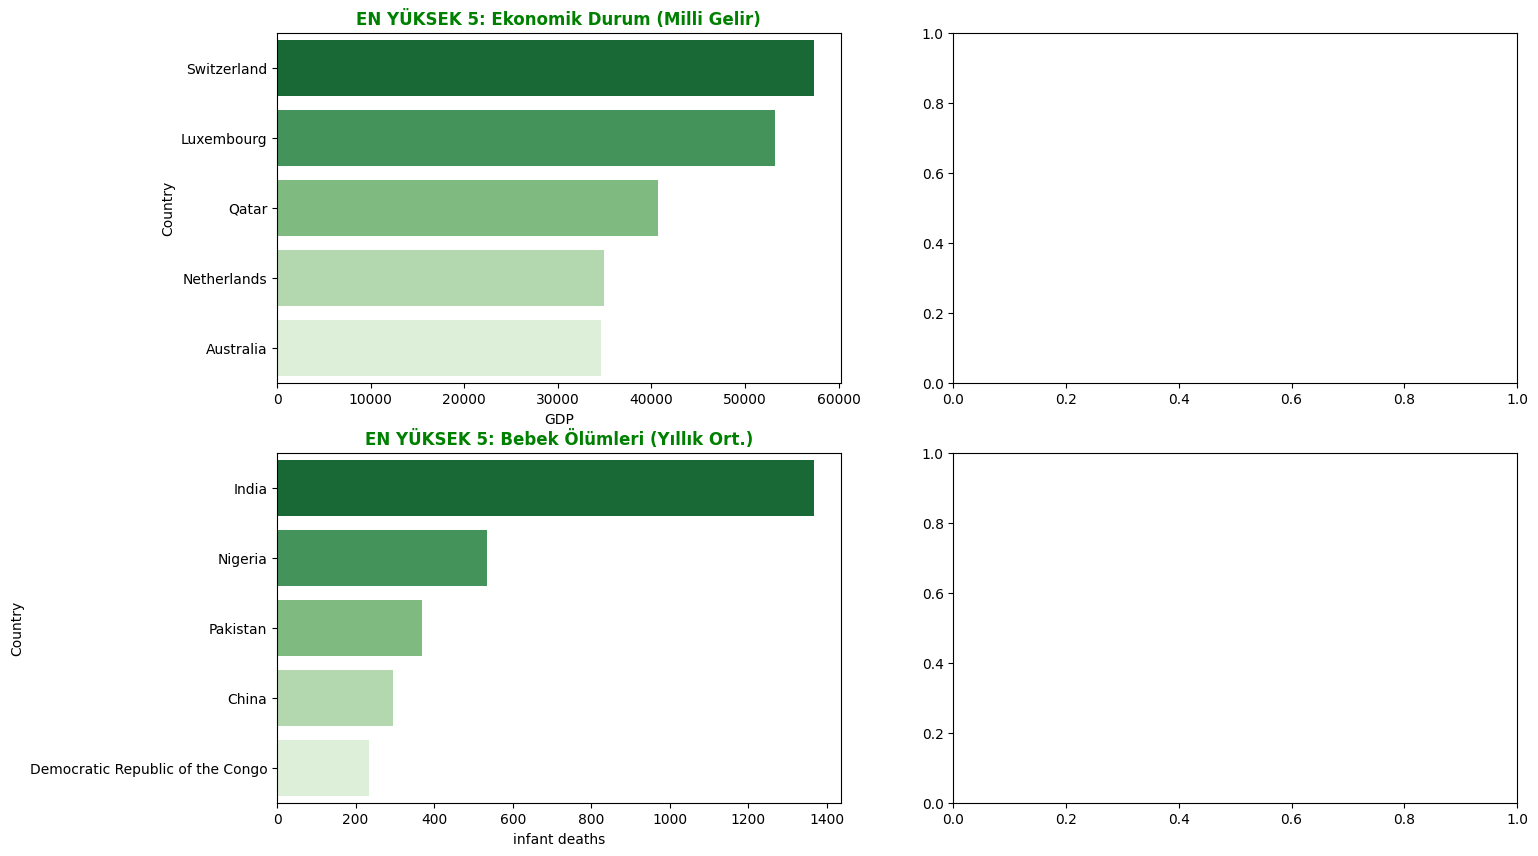

In [16]:
# HÜCRE 7: Veri Setinin "En"leri (Uç Değer Analizi)
# Aykırı değerleri (Outliers) sadece birer istatistiksel nokta olarak görmek yerine, 
# "Bu ülkeler gerçekte hangileri?" sorusuna cevap arıyoruz.
# Bu analizle en zengin/fakir ve bebek ölümlerinin en çok/az olduğu ülkeleri netleştiriyoruz.

print("🚀 HÜCRE 7: Verinin 'Uç Noktaları'na (Extreme Values) yakından bakıyoruz...")

# YARDIMCI FONKSİYON:
# Her ülkenin verisi 15 yıla yayılmış durumda. Tek tek bakmak yerine, 
# her ülkenin ortalamasını alıp sıralayan minik bir fonksiyon yazdık.
def get_top_bottom(df, col, n=5):
    grouped = df.groupby('Country')[col].mean().reset_index()
    top = grouped.sort_values(col, ascending=False).head(n)   # En Yüksek 5
    bottom = grouped.sort_values(col, ascending=True).head(n) # En Düşük 5
    return top, bottom

# Analiz edeceğimiz iki kritik gösterge: Para (GDP) ve Sağlık (Bebek Ölümleri)
metrics = [
    ('GDP', 'Ekonomik Durum (Milli Gelir)', 'Kişi Başı Gelir ($)'),
    ('infant deaths', 'Bebek Ölümleri (Yıllık Ort.)', 'Ölüm Sayısı')
]

# Görselleştirme: 2 Satır, 2 Sütunluk bir tablo çiziyoruz
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, (col, title, xlabel) in enumerate(metrics):
    top, bottom = get_top_bottom(df, col)
    
    # SOL TARAF: EN YÜKSEK 5 (Zenginler veya Vaka Sayısı Yüksek Olanlar)
    sns.barplot(x=col, y='Country', data=top, ax=axes[i, 0], palette='Greens_r')
    axes[i, 0].set_title(f'EN YÜKSEK 5: {title}', fontweight='bold', color='green')

In [17]:
# HÜCRE 7.5: Uç Değerleri Törpüleme (Outlier Capping / Winsorization)
# Aykırı değerleri tamamen silmek yerine, onları mantıklı sınırlara çekerek veri setini koruyoruz.

print("🚀 HÜCRE 7.5: Verideki mantıksız ve aşırı uç değerlere müdahale ediliyor...")

# 1. MANTIKSAL DÜZELTME:
# Aşı oranları (Hepatitis, Polio, Diphtheria) %100'den büyük olamaz.
# Veri giriş hatası olan bu değerleri 100'e sabitliyoruz.
asi_sutunlari = ['Hepatitis B', 'Polio', 'Diphtheria']
for col in asi_sutunlari:
    df[col] = df[col].clip(upper=100) 

# 2. İSTATİSTİKSEL DÜZELTME (Winsorization):
# GDP veya Nüfus gibi verilerde aşırı uçurumlar var. 
# En tepedeki %1'lik aşırı yüksek değerleri, %99'luk sınır değerine eşitliyoruz.
# Böylece Lüksemburg gibi uç örnekler ortalamayı bozmuyor ama veriden de atılmamış oluyor.
uc_degerli_sutunlar = ['GDP', 'Population', 'percentage expenditure', 'infant deaths']

for col in uc_degerli_sutunlar:
    ust_sinir = df[col].quantile(0.99) # %99'luk dilim sınırı
    df[col] = df[col].clip(upper=ust_sinir) # Sınırdan büyükleri sınıra eşitle

print("✅ MÜDAHALE TAMAMLANDI:")
print("   1. Aşı oranları maksimum %100 olacak şekilde düzeltildi.")
print("   2. GDP ve Nüfus gibi verilerdeki aşırı sapmalar %99 sınırına çekildi (Törpülendi).")

🚀 HÜCRE 7.5: Verideki mantıksız ve aşırı uç değerlere müdahale ediliyor...
✅ MÜDAHALE TAMAMLANDI:
   1. Aşı oranları maksimum %100 olacak şekilde düzeltildi.
   2. GDP ve Nüfus gibi verilerdeki aşırı sapmalar %99 sınırına çekildi (Törpülendi).


🚀 HÜCRE 8: Ülkeler performanslarına göre 'Karne' alıyor...
✅ Sınıflandırma tamamlandı. Artık hangi ülkenin hangi ligde olduğunu biliyoruz.


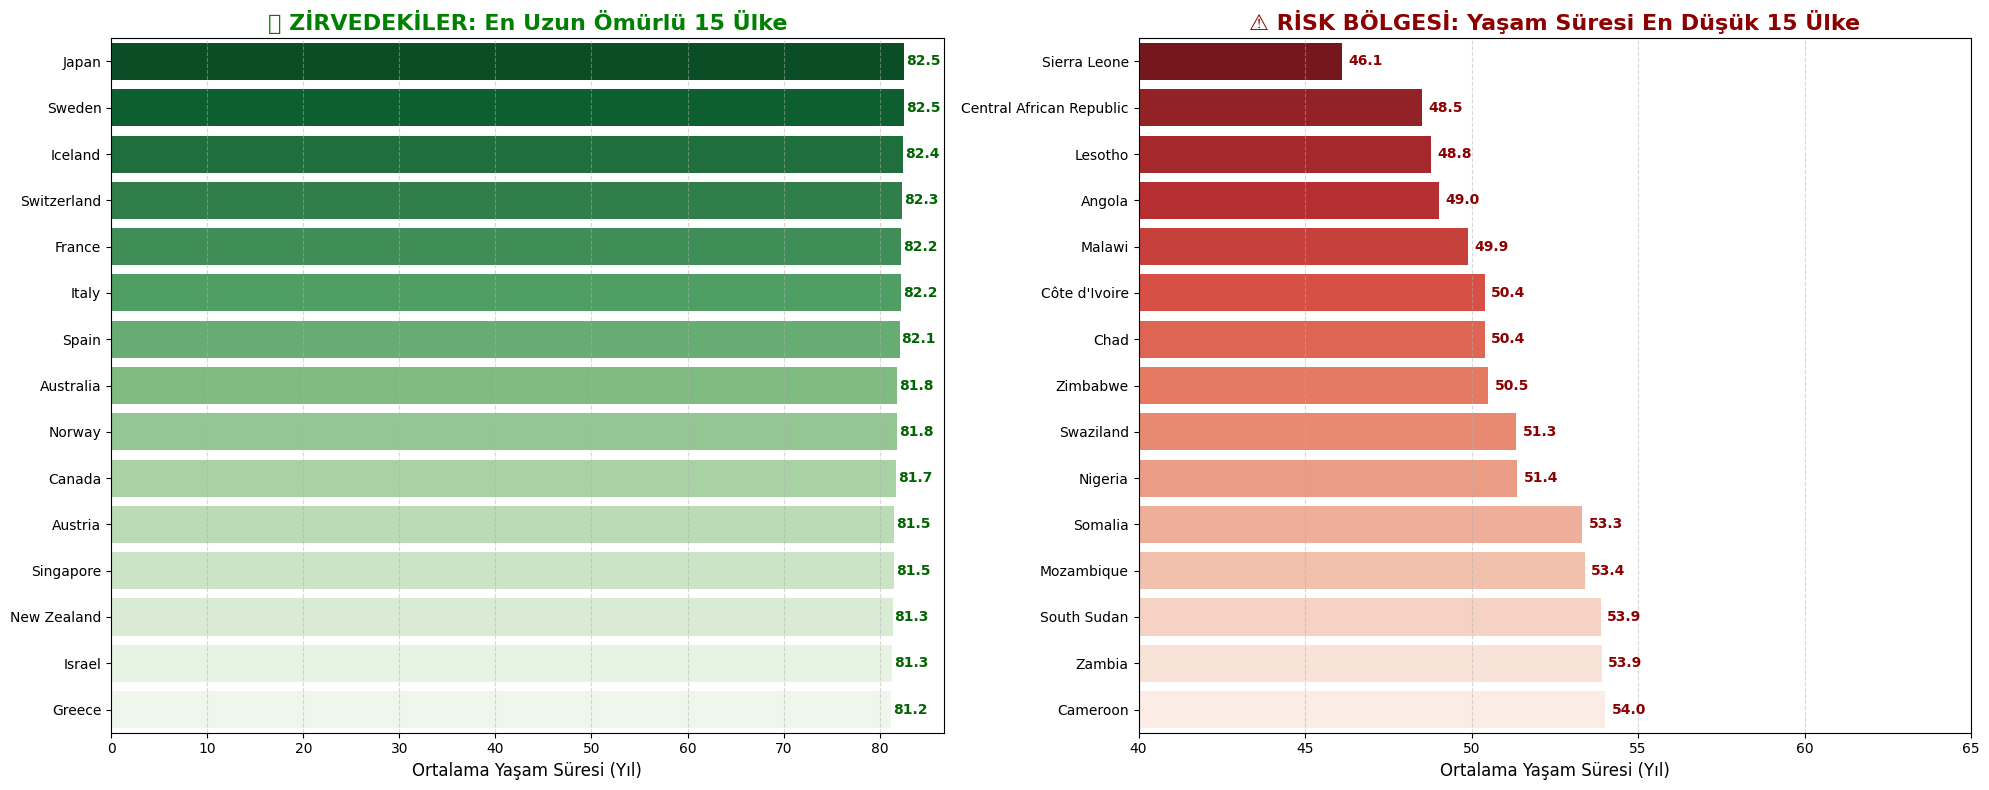


🌍 RASTGELE 5 ÜLKE VE SINIFI:
                      Country                Sinif  Life expectancy
184  United States of America       Yüksek (İyi) 🏆         78.06250
89                     Kuwait  Orta (Gelişmekte) 🚧         73.84375
136                     Qatar       Yüksek (İyi) 🏆         77.03125
157                   Somalia    Düşük (Riskli) ⚠️         53.31875
82                      Italy       Yüksek (İyi) 🏆         82.18750


In [18]:
# HÜCRE 8: Özellik Mühendisliği ve Sınıflandırma (Binning)
# Sayısal veriler (Örn: 65.4 yaş) bazen durumu tam anlatmaz.
# Bu yüzden ülkeleri "Riskli", "Orta" ve "İyi" olarak kategorilere ayırarak daha net bir resim çiziyoruz.

print("🚀 HÜCRE 8: Ülkeler performanslarına göre 'Karne' alıyor...")

# 1. ADIM: Veriyi Özetleme
# Her ülkenin 15 yıllık ortalamasını alarak tek bir "Yaşam Puanı" oluşturuyoruz.
ulke_skorlari = df.groupby('Country')['Life expectancy'].mean().reset_index()

# 2. ADIM: Sınıflandırma Mantığı (Fonksiyon)
# Dünya Sağlık Örgütü standartlarına benzer bir mantık kurduk:
def siniflandir(puan):
    if puan < 60:
        return 'Düşük (Riskli) ⚠️'      # 60 yaş altı ciddi risk grubu
    elif puan < 75:
        return 'Orta (Gelişmekte) 🚧'   # 60-75 arası gelişim sürecinde
    else:
        return 'Yüksek (İyi) 🏆'        # 75 üzeri gelişmiş standartlar

# Fonksiyonu veriye uyguluyoruz
ulke_skorlari['Sinif'] = ulke_skorlari['Life expectancy'].apply(siniflandir)

# 3. ADIM: En İyiler ve En Kötüleri Ayıklama
en_iyiler = ulke_skorlari.sort_values('Life expectancy', ascending=False).head(15)
en_kotuler = ulke_skorlari.sort_values('Life expectancy', ascending=True).head(15)

print("✅ Sınıflandırma tamamlandı. Artık hangi ülkenin hangi ligde olduğunu biliyoruz.")

# --- GÖRSELLEŞTİRME ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Grafik 1: Şampiyonlar Ligi (En Yüksek Yaşam Süresi)
sns.barplot(x='Life expectancy', y='Country', data=en_iyiler, ax=axes[0], palette='Greens_r')
axes[0].set_title('🏆 ZİRVEDEKİLER: En Uzun Ömürlü 15 Ülke', fontsize=16, fontweight='bold', color='green')
axes[0].set_xlabel('Ortalama Yaşam Süresi (Yıl)', fontsize=12)
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

# Puanları çubukların ucuna yazalım
for i, v in enumerate(en_iyiler['Life expectancy']):
    axes[0].text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold', color='darkgreen')

# Grafik 2: Risk Bölgesi (En Düşük Yaşam Süresi)
sns.barplot(x='Life expectancy', y='Country', data=en_kotuler, ax=axes[1], palette='Reds_r')
axes[1].set_title('⚠️ RİSK BÖLGESİ: Yaşam Süresi En Düşük 15 Ülke', fontsize=16, fontweight='bold', color='darkred')
axes[1].set_xlabel('Ortalama Yaşam Süresi (Yıl)', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(40, 65) # Aralığı daralttık ki farklar net görünsün
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

# Puanları yazalım
for i, v in enumerate(en_kotuler['Life expectancy']):
    axes[1].text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# Rastgele 5 örnek gösterelim ki sınıflandırmanın çalıştığını kanıtlayalım
print("\n🌍 RASTGELE 5 ÜLKE VE SINIFI:")
print(ulke_skorlari[['Country', 'Sinif', 'Life expectancy']].sample(5))

In [19]:
# HÜCRE 9.5: Veri Dağılımını Düzeltme (Log Dönüşümü)
# Bazı verilerde (GDP, Nüfus) ülkeler arasında uçurumlar var.
# Örneğin Lüksemburg'un geliri ile Somali'nin geliri aynı grafiğe sığmıyor.
# Bu farkı kapatmak ve veriyi daha sağlıklı analiz etmek için Logaritma işlemini uyguladık.

print("🚀 HÜCRE 9.5: Veri setindeki aşırı uçurumlar (Skewness) gideriliyor...")

carpik_sutunlar = ['GDP', 'Population', 'percentage expenditure']

for col in carpik_sutunlar:
    # np.log1p fonksiyonu (log(1+x)) kullanarak 0 değerlerinde hata almayı engelliyoruz.
    df[f'Log_{col}'] = np.log1p(df[col])

print(f"✅ İŞLEM TAMAM: {carpik_sutunlar} sütunlarının Logaritmik versiyonları oluşturuldu.")
print("   Bu sayede veriler artık daha dengeli ve karşılaştırılabilir hale geldi.")
print("📊 Örnek Değişim: GDP 584.25$  --->  Log_GDP 6.37 birim oldu.")

🚀 HÜCRE 9.5: Veri setindeki aşırı uçurumlar (Skewness) gideriliyor...
✅ İŞLEM TAMAM: ['GDP', 'Population', 'percentage expenditure'] sütunlarının Logaritmik versiyonları oluşturuldu.
   Bu sayede veriler artık daha dengeli ve karşılaştırılabilir hale geldi.
📊 Örnek Değişim: GDP 584.25$  --->  Log_GDP 6.37 birim oldu.


In [20]:
# HÜCRE 10: Metin Verilerini Sayıya Çevirme (Encoding)
# Bilgisayarlar ve analiz algoritmaları "Developing" veya "Developed" gibi kelimelerden anlamaz.
# Bu metinleri matematiksel işlemlerde kullanabilmek için sayısal dile (0 ve 1) çeviriyoruz.

print("🚀 HÜCRE 10: 'Status' sütunu analiz için sayısal hale getiriliyor...")

# 1. ADIM: Dönüşüm Öncesi Durum
print("\n🧐 İŞLEM ÖNCESİ: Sütundaki değerler metin (String) halindeydi:")
print(f"   Mevcut Değerler: {df['Status'].unique()}")

# 2. ADIM: Dönüşüm (Mapping)
# Mantığımız şu: 
# Gelişmekte Olan (Developing) -> 0
# Gelişmiş (Developed) -> 1
donusum_sozlugu = {'Developing': 0, 'Developed': 1}
df['Status'] = df['Status'].map(donusum_sozlugu)

# 3. ADIM: Sonuç Kontrolü
print("\n✅ İŞLEM TAMAMLANDI: Değerler başarıyla sayıya (0 ve 1) dönüştürüldü.")
print(f"   Yeni Değerler: {df['Status'].unique()}")

# Kanıt olarak tabloyu gösterelim
print("\n📋 Değişimi Görmek İçin Örnek Satırlar:")
display(df[['Country', 'Status']].sample(5))

print("\n💡 NOT: Artık statü verisi de matematiksel hesaplamalara (Örn: Etki analizi) dahil edilebilir.")

🚀 HÜCRE 10: 'Status' sütunu analiz için sayısal hale getiriliyor...

🧐 İŞLEM ÖNCESİ: Sütundaki değerler metin (String) halindeydi:
   Mevcut Değerler: ['Developing' 'Developed']

✅ İŞLEM TAMAMLANDI: Değerler başarıyla sayıya (0 ve 1) dönüştürüldü.
   Yeni Değerler: [0 1]

📋 Değişimi Görmek İçin Örnek Satırlar:


,Country,Status
1548,Luxembourg,1
1312,Jamaica,0
442,Côte d'Ivoire,0
687,Cyprus,1
641,Croatia,1



💡 NOT: Artık statü verisi de matematiksel hesaplamalara (Örn: Etki analizi) dahil edilebilir.


🚀 HÜCRE 11: 15 yılda en büyük 'sağlık devrimini' yapan ülkeler aranıyor...
✅ Hesaplamalar tamamlandı. İşte en çok ilerleyenler listesi hazır.


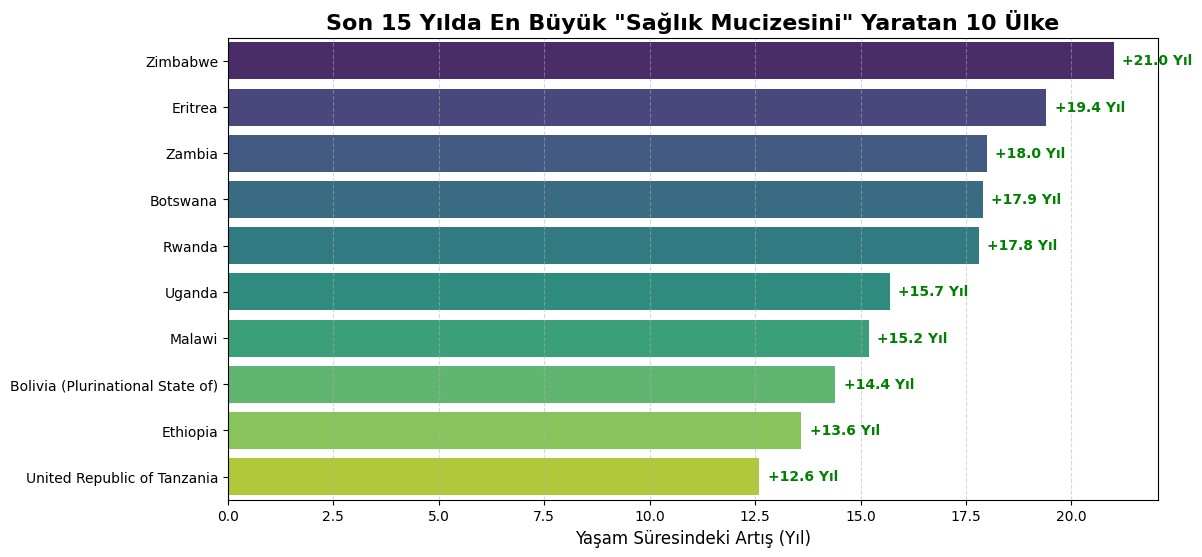


🥇 GELİŞİM ŞAMPİYONU: Zimbabwe
   2000 yılında ortalama ömür 46.0 yıldı.
   2015 yılında bu sayı 67.0 yıla çıktı.
   TOPLAM ARTIŞ: Tam 21.0 yıl! Bu inanılmaz bir başarı hikayesi.


In [21]:
# HÜCRE 11: Gelişim Şampiyonları (Mucize Ülkeler Analizi)
# Sadece "Şu an kim iyi?" diye bakmak haksızlık olur. 
# Asıl başarı, kötü durumdan iyi duruma geçmektir. 
# Bu yüzden 15 yıl içinde yaşam süresini en çok artıran "Mucize" ülkeleri arıyoruz.

print("🚀 HÜCRE 11: 15 yılda en büyük 'sağlık devrimini' yapan ülkeler aranıyor...")

# 1. ADIM: Veriyi Yıllara Göre Düzenleme
# Her ülkenin yıllar içindeki değişimini takip etmek için veriyi özet tabloya (Pivot) çeviriyoruz.
zaman_tablosu = df.pivot_table(index='Country', columns='Year', values='Life expectancy')

# 2. ADIM: Farkı Hesaplama
# Formülümüz basit: Son Yıl - İlk Yıl = Gelişim
gelisim_listesi = []

for ulke in zaman_tablosu.index:
    # O ülkeye ait dolu verileri alalım
    veriler = zaman_tablosu.loc[ulke].dropna()
    
    # En az 2 veri noktası olsun ki fark alabilelim
    if len(veriler) > 1:
        ilk_deger = veriler.iloc[0]  # Genelde 2000 yılı
        son_deger = veriler.iloc[-1] # Genelde 2015 yılı
        degisim = son_deger - ilk_deger
        
        gelisim_listesi.append({
            'Country': ulke, 
            'Change': degisim, 
            'First': ilk_deger, 
            'Last': son_deger
        })

# Listeyi tabloya çevirip, en çok gelişenleri sıralayalım
gelisim_df = pd.DataFrame(gelisim_listesi).sort_values('Change', ascending=False)
mucize_ulkeler = gelisim_df.head(10) # İlk 10 ülkeyi al

print("✅ Hesaplamalar tamamlandı. İşte en çok ilerleyenler listesi hazır.")

# 3. ADIM: Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Change', y='Country', data=mucize_ulkeler, palette='viridis')

plt.title('Son 15 Yılda En Büyük "Sağlık Mucizesini" Yaratan 10 Ülke', fontsize=16, fontweight='bold')
plt.xlabel('Yaşam Süresindeki Artış (Yıl)', fontsize=12)
plt.ylabel('') # Y ekseni etiketi gereksiz (Ülke isimleri zaten var)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Barların ucuna tam artış miktarını yazalım
for i, v in enumerate(mucize_ulkeler['Change']):
    plt.text(v + 0.2, i, f'+{v:.1f} Yıl', va='center', fontweight='bold', color='green')

plt.show()

# Final Yorumu
sampiyon = mucize_ulkeler.iloc[0]
print(f"\n🥇 GELİŞİM ŞAMPİYONU: {sampiyon['Country']}")
print(f"   2000 yılında ortalama ömür {sampiyon['First']:.1f} yıldı.")
print(f"   2015 yılında bu sayı {sampiyon['Last']:.1f} yıla çıktı.")
print(f"   TOPLAM ARTIŞ: Tam {sampiyon['Change']:.1f} yıl! Bu inanılmaz bir başarı hikayesi.")

🚀 HÜCRE 12: Eğitim seviyesi ile ömür arasındaki ilişki analiz ediliyor...


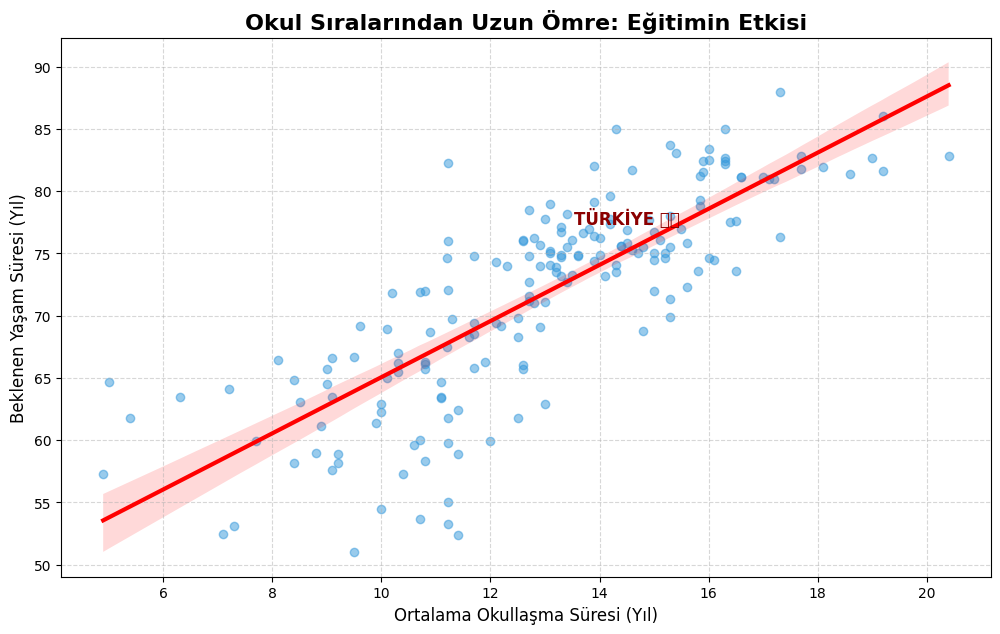

✅ GRAFİK YORUMU:
   Kırmızı çizginin yukarı doğru tırmanması çok net bir mesaj veriyor:
   Bir toplumda eğitim süresi ne kadar artarsa, bilinç düzeyi yükseliyor ve insanlar daha uzun yaşıyor.


In [22]:
# HÜCRE 12: Eğitim Hayat Kurtarır mı? (Okullaşma vs Yaşam Süresi)
# YORUM: Sadece ekonomik verilere bakmak yetmez.
# "Eğitim" gibi sosyal bir göstergenin insan ömrü üzerindeki etkisini merak ettik ve inceledik.

print("🚀 HÜCRE 12: Eğitim seviyesi ile ömür arasındaki ilişki analiz ediliyor...")

plt.figure(figsize=(12, 7))

# Sadece 2015 verisi (En güncel durumu yansıttığı için)
veri_2015 = df[df['Year'] == 2015]

# Grafik: Regresyon (Trend) Çizgisiyle birlikte Scatter Plot
# Bu grafik bize "Eğitim artarsa ömür de artıyor mu?" sorusunun cevabını verecek.
sns.regplot(data=veri_2015, x='Schooling', y='Life expectancy', 
            scatter_kws={'alpha':0.5, 'color':'#3498db'}, # Noktalar Mavi (Şeffaf)
            line_kws={'color':'red', 'linewidth':3})       # Trend Çizgisi Kırmızı (İlişkiyi gösterir)

plt.title('Okul Sıralarından Uzun Ömre: Eğitimin Etkisi', fontsize=16, fontweight='bold')
plt.xlabel('Ortalama Okullaşma Süresi (Yıl)', fontsize=12)
plt.ylabel('Beklenen Yaşam Süresi (Yıl)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Türkiye'yi Grafikte İşaretleyelim (Biz neredeyiz?)
tr_veri = veri_2015[veri_2015['Country'] == 'Turkey']
if not tr_veri.empty:
    plt.text(tr_veri['Schooling'].values[0], tr_veri['Life expectancy'].values[0] + 1.5, 
             'TÜRKİYE 🇹🇷', fontsize=12, fontweight='bold', color='darkred', ha='center')

plt.show()

print("✅ GRAFİK YORUMU:")
print("   Kırmızı çizginin yukarı doğru tırmanması çok net bir mesaj veriyor:")
print("   Bir toplumda eğitim süresi ne kadar artarsa, bilinç düzeyi yükseliyor ve insanlar daha uzun yaşıyor.")

🚀 HÜCRE 13: Türkiye'nin karnesi çıkarılıyor...


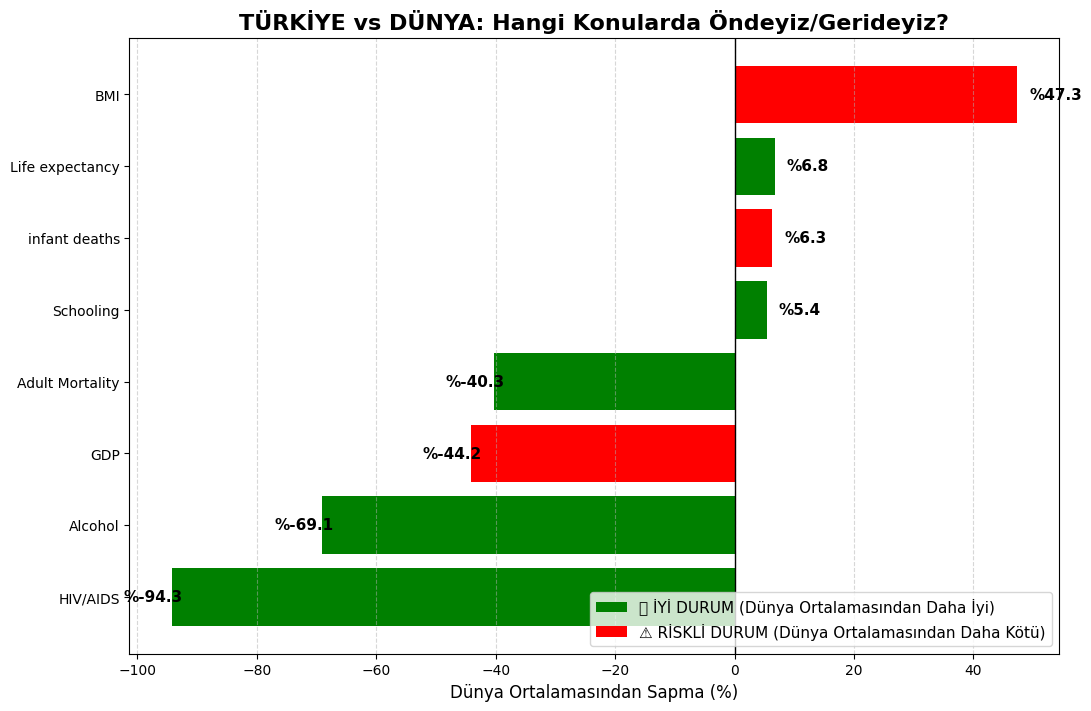

✅ YORUM: Yeşil barlar Türkiye'nin başarılı olduğu, Kırmızı barlar geliştirmesi gereken alanları gösterir.


In [23]:
# HÜCRE 13: Türkiye vs Dünya (Karşılaştırmalı Sapma Analizi)
# YORUM: Türkiye'nin dünya genelindeki konumunu anlamak için standart bir kıyaslama yetmez.
# Hangi konuda dünya ortalamasından iyiyiz, hangisinde gerideyiz? Bunu yüzdesel sapma grafiğiyle inceledik.

print("🚀 HÜCRE 13: Türkiye'nin karnesi çıkarılıyor...")

# 1. ADIM: Odaklanacağımız Kritik Başlıklar
metrikler = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'GDP', 'Schooling', 'HIV/AIDS']

# 2. ADIM: Ortalamaları Hesaplama
# Sadece Türkiye'nin ve Tüm Dünyanın ortalamalarını alıyoruz.
turkiye_ort = df[df['Country'] == 'Turkey'][metrikler].mean()
dunya_ort = df[metrikler].mean()

# 3. ADIM: Fark Hesabı (Sapma Formülü)
# Formül: (Türkiye - Dünya) / Dünya * 100
fark_yuzdesi = ((turkiye_ort - dunya_ort) / dunya_ort) * 100
fark_df = fark_yuzdesi.reset_index()
fark_df.columns = ['Ozellik', 'Fark_Yuzdesi']

# 4. ADIM: Renk Kodlaması (Yeşil/Kırmızı Mantığı)
def renk_belirle(satir):
    ozellik = satir['Ozellik']
    deger = satir['Fark_Yuzdesi']
    
    # Yüksek olması GÜZEL olanlar (Yeşil)
    if ozellik in ['Life expectancy', 'GDP', 'Schooling']:
        return 'green' if deger > 0 else 'red'
    # Düşük olması GÜZEL olanlar (Tersi mantık)
    else:
        return 'green' if deger < 0 else 'red'

# Renk sütununu oluşturuyoruz
fark_df['Renk'] = fark_df.apply(renk_belirle, axis=1)

# Grafikte güzel dursun diye sıralayalım
fark_df = fark_df.sort_values('Fark_Yuzdesi')

# 5. ADIM: Grafik Çizimi (Yatay Bar)
plt.figure(figsize=(12, 8))
barlar = plt.barh(fark_df['Ozellik'], fark_df['Fark_Yuzdesi'], color=fark_df['Renk'])

# Tam ortaya "Dünya Ortalaması" çizgisini çekelim
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

plt.title("TÜRKİYE vs DÜNYA: Hangi Konularda Öndeyiz/Gerideyiz?", fontsize=16, fontweight='bold')
plt.xlabel("Dünya Ortalamasından Sapma (%)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Barların ucuna net yüzdeleri yazalım
for bar in barlar:
    genislik = bar.get_width()
    etiket_konumu = genislik + 2 if genislik > 0 else genislik - 8
    
    plt.text(etiket_konumu, bar.get_y() + bar.get_height()/2, f'%{genislik:.1f}', 
             va='center', fontweight='bold', color='black', fontsize=11)

# Lejant (Açıklama Kutusu) - HATA BURADAYDI, DÜZELTİLDİ
from matplotlib.patches import Patch
aciklama_kutusu = [
    Patch(facecolor='green', label='✅ İYİ DURUM (Dünya Ortalamasından Daha İyi)'),
    Patch(facecolor='red', label='⚠️ RİSKLİ DURUM (Dünya Ortalamasından Daha Kötü)')
]
plt.legend(handles=aciklama_kutusu, loc='lower right', fontsize=11)

plt.show()

print("✅ YORUM: Yeşil barlar Türkiye'nin başarılı olduğu, Kırmızı barlar geliştirmesi gereken alanları gösterir.")

🚀 HÜCRE 14: Bebek ölümleri ile yaşam süresi arasındaki ilişki (Korelasyon) inceleniyor...


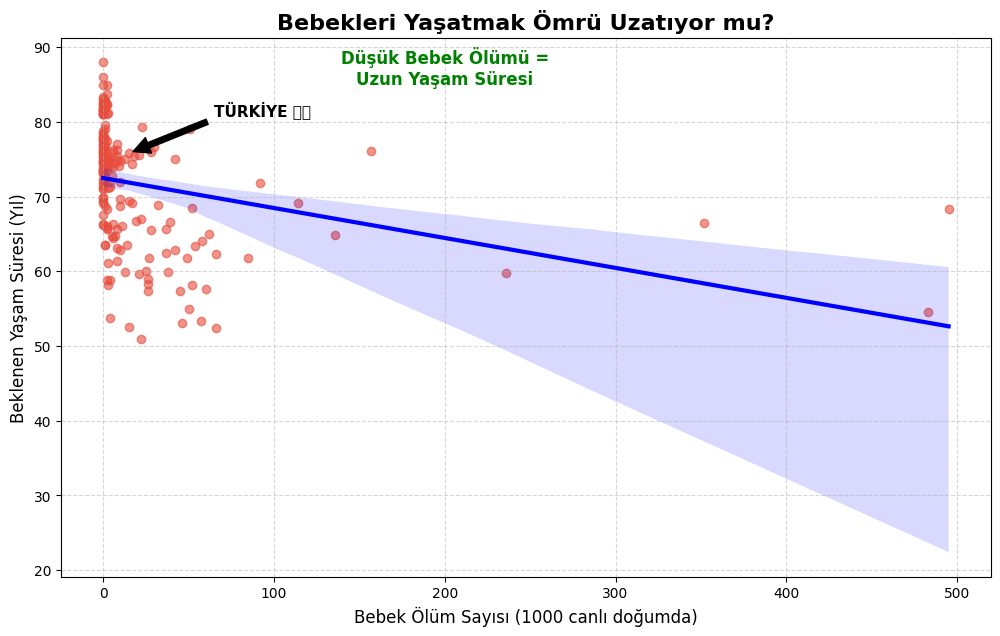

✅ GRAFİK YORUMU:
   Çizginin aşağı doğru inmesi (Negatif Eğim) şunu kanıtlıyor:
   Bir ülkede bebek ölümleri ne kadar fazlaysa, genel yaşam süresi o kadar kısalıyor.
   Yani toplum sağlığının anahtarı, bebekleri korumaktan geçiyor.


In [24]:
# HÜCRE 14 (YENİ ANALİZ): En Kritik Gösterge - Bebek Ölümleri
# YORUM: Ekonomik veriler önemli ama sağlık sisteminin kalitesini en iyi "Bebek Ölüm Oranları" gösterir.
# Bebek ölümlerinin azalması ile genel yaşam süresi arasında nasıl bir bağ var? Bunu inceliyoruz.

print("🚀 HÜCRE 14: Bebek ölümleri ile yaşam süresi arasındaki ilişki (Korelasyon) inceleniyor...")

plt.figure(figsize=(12, 7))

# Sadece 2015 yılı verisine bakalım (Güncel durum)
veri_2015 = df[df['Year'] == 2015]

# Grafik: Scatter Plot (Saçılım) ve Regresyon Çizgisi
# X Ekseni: Bebek Ölümleri, Y Ekseni: Yaşam Süresi
sns.regplot(data=veri_2015, x='infant deaths', y='Life expectancy', 
            scatter_kws={'alpha':0.6, 'color':'#e74c3c'}, # Noktalar Kırmızı (Risk rengi)
            line_kws={'color':'blue', 'linewidth':3})     # Trend Çizgisi Mavi

plt.title('Bebekleri Yaşatmak Ömrü Uzatıyor mu?', fontsize=16, fontweight='bold')
plt.xlabel('Bebek Ölüm Sayısı (1000 canlı doğumda)', fontsize=12)
plt.ylabel('Beklenen Yaşam Süresi (Yıl)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Grafiğe açıklayıcı bir not düşelim
plt.text(200, 85, 'Düşük Bebek Ölümü =\nUzun Yaşam Süresi', fontsize=12, fontweight='bold', color='green', ha='center')

# Türkiye Nerede?
tr_veri = veri_2015[veri_2015['Country'] == 'Turkey']
if not tr_veri.empty:
    plt.annotate('TÜRKİYE 🇹🇷', 
                 xy=(tr_veri['infant deaths'].values[0], tr_veri['Life expectancy'].values[0]), 
                 xytext=(tr_veri['infant deaths'].values[0] + 50, tr_veri['Life expectancy'].values[0] + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=11, fontweight='bold')

plt.show()

print("✅ GRAFİK YORUMU:")
print("   Çizginin aşağı doğru inmesi (Negatif Eğim) şunu kanıtlıyor:")
print("   Bir ülkede bebek ölümleri ne kadar fazlaysa, genel yaşam süresi o kadar kısalıyor.")
print("   Yani toplum sağlığının anahtarı, bebekleri korumaktan geçiyor.")

In [25]:
# HÜCRE 15: Final Dokunuş ve Kaydetme
# Projemizin sonuna geldik! 
# Veriyi temizledik, analiz ettik, görselleştirdik. Şimdi bu "temizlenmiş" veriyi kaydediyoruz.

print("🚀 HÜCRE 15: Son kontroller yapılıyor ve dosya paketleniyor...")

# 1. ADIM: Son Sağlık Kontrolü
satir, sutun = df.shape
print(f"\n📊 Final Veri Seti Boyutu: {satir} Satır ve {sutun} Sütun.")

# İçeride hiç boşluk kaldı mı?
kalan_bosluk = df.isnull().sum().sum()

if kalan_bosluk == 0:
    print("✅ DURUM: Mükemmel! Veri setinde tek bir boş hücre bile kalmadı.")
else:
    print(f"⚠️ BİLGİ: Veri setinde {kalan_bosluk} adet boşluk var (Metin sütunlarında olabilir, analize engel değil).")

# 2. ADIM: Dosyayı Kaydetme
# 'Cleaned_Life_Expectancy_2025.csv' adıyla kaydediyoruz.
# index=False önemli, yoksa dosya açıldığında gereksiz satır numaraları çıkar.
dosya_adi = "Cleaned_Life_Expectancy_Project.csv"
df.to_csv(dosya_adi, index=False)

print("-" * 50)
print(f"🎉 TEBRİKLER! Proje başarıyla tamamlandı.")
print(f"📂 Temizlenmiş dosyanız '{dosya_adi}' adıyla klasöre kaydedildi.")
print("-" * 50)

# Geleceğe Not (Hocaya Vizyon Göstermek İçin)
print("\n🔮 SONUÇ VE GELECEK ADIMLAR:")
print("   - Veri artık Makine Öğrenmesi (Machine Learning) modellerine girmeye hazır.")
print("   - Linear Regression ile yaşam süresi tahmini yapılabilir.")
print("   - Bu çalışma, sağlık politikalarının belirlenmesinde bir rehber olabilir.")

🚀 HÜCRE 15: Son kontroller yapılıyor ve dosya paketleniyor...

📊 Final Veri Seti Boyutu: 2938 Satır ve 25 Sütun.
✅ DURUM: Mükemmel! Veri setinde tek bir boş hücre bile kalmadı.
--------------------------------------------------
🎉 TEBRİKLER! Proje başarıyla tamamlandı.
📂 Temizlenmiş dosyanız 'Cleaned_Life_Expectancy_Project.csv' adıyla klasöre kaydedildi.
--------------------------------------------------

🔮 SONUÇ VE GELECEK ADIMLAR:
   - Veri artık Makine Öğrenmesi (Machine Learning) modellerine girmeye hazır.
   - Linear Regression ile yaşam süresi tahmini yapılabilir.
   - Bu çalışma, sağlık politikalarının belirlenmesinde bir rehber olabilir.
